In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Initial inspection and cleaning
---

In [2]:
# Read data and insepct first five rows.
ds_posts = pd.read_xml('../data/ds/posts.xml')
ds_posts.head()

Id  PostTypeId             CreationDate  Score  ViewCount  \
0   5           1  2014-05-13T23:58:30.457      9      959.0   
1   7           1  2014-05-14T00:11:06.457      4      503.0   
2   9           2  2014-05-14T00:36:31.077      5        NaN   
3  10           2  2014-05-14T00:53:43.273     13        NaN   
4  14           1  2014-05-14T01:25:59.677     26     1925.0   

                                                Body  OwnerUserId  \
0  <p>I've always been interested in machine lear...          5.0   
1  <p>As a researcher and instructor, I'm looking...         36.0   
2  <p>Not sure if this fits the scope of this SE,...         51.0   
3  <p>One book that's freely available is "The El...         22.0   
4  <p>I am sure data science as will be discussed...         66.0   

          LastActivityDate                                              Title  \
0  2014-05-14T00:36:31.077  How can I do simple machine learning without h...   
1  2014-05-16T13:45:00.237  What open-source books (or other materials) pr...   
2  2014-05-14T00:36:31.077                                               None   
3  2014-05-14T00:53:43.273                                               None   
4  2020-08-16T13:01:33.543           Is Data Science the Same as Data Mining?   

                         Tags  ...               ClosedDate  ContentLicense  \
0          <machine-learning>  ...  2014-05-14T14:40:25.950    CC BY-SA 3.0   
1    <education><open-source>  ...  2014-05-14T08:40:54.950    CC BY-SA 3.0   
2                        None  ...                     None    CC BY-SA 3.0   
3                        None  ...                     None    CC BY-SA 3.0   
4  <data-mining><definitions>  ...                     None    CC BY-SA 3.0   

  AcceptedAnswerId LastEditorUserId             LastEditDate  ParentId  \
0              NaN              NaN                     None       NaN   
1             10.0             97.0  2014-05-16T13:45:00.237       NaN   
2              NaN              NaN                     None       5.0   
3              NaN              NaN                     None       7.0   
4             29.0            322.0  2014-06-17T16:17:20.473       NaN   

  OwnerDisplayName  CommunityOwnedDate LastEditorDisplayName FavoriteCount  
0             None                None                  None           NaN  
1             None                None                  None           NaN  
2             None                None                  None           NaN  
3             None                None                  None           NaN  
4             None                None                  None           NaN  

[5 rows x 22 columns]

In [3]:
# Get column info.
ds_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78833 entries, 0 to 78832
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     78833 non-null  int64  
 1   PostTypeId             78833 non-null  int64  
 2   CreationDate           78833 non-null  object 
 3   Score                  78833 non-null  int64  
 4   ViewCount              36792 non-null  float64
 5   Body                   78665 non-null  object 
 6   OwnerUserId            78367 non-null  float64
 7   LastActivityDate       78833 non-null  object 
 8   Title                  36792 non-null  object 
 9   Tags                   36792 non-null  object 
 10  AnswerCount            36792 non-null  float64
 11  CommentCount           78833 non-null  int64  
 12  ClosedDate             2264 non-null   object 
 13  ContentLicense         78833 non-null  object 
 14  AcceptedAnswerId       12146 non-null  float64
 15  La

In [4]:
# Statistics for numeric columns
ds_posts.select_dtypes('number').describe().T

count          mean           std   min       25%  \
Id                78833.0  62693.771669  36436.008349   5.0  31016.00   
PostTypeId        78833.0      1.555186      0.571774   1.0      1.00   
Score             78833.0      2.065138      6.407012  -6.0      0.00   
ViewCount         36792.0   2110.380300  10830.220741   1.0     64.00   
OwnerUserId       78367.0  63373.336557  42659.140812  -1.0  28175.00   
AnswerCount       36792.0      1.124157      1.036488   0.0      1.00   
CommentCount      78833.0      1.042419      1.839292   0.0      0.00   
AcceptedAnswerId  12146.0  58313.267331  35012.297335  10.0  28090.50   
LastEditorUserId  28350.0  52410.456720  40711.797575  -1.0  25180.00   
ParentId          41360.0  55402.757447  35408.699159   5.0  25359.75   
FavoriteCount       585.0      0.001709      0.041345   0.0      0.00   

                      50%       75%       max  
Id                61504.0  93567.00  128113.0  
PostTypeId            2.0      2.00       7.0  
Score                 1.0      2.00     485.0  
ViewCount           229.0    984.00  496643.0  
OwnerUserId       60710.0  92050.00  161195.0  
AnswerCount           1.0      1.00      35.0  
CommentCount          0.0      2.00      24.0  
AcceptedAnswerId  55469.5  86532.25  128093.0  
LastEditorUserId  43000.0  83275.00  161162.0  
ParentId          52006.0  82433.50  128110.0  
FavoriteCount         0.0      0.00       1.0

We note a large difference between the mean and median and a large standard deviation for `ViewCount`. Beware many of the numeric columns (such as `Id` and `PostTypeId`) are for identification, hence aggregated statistics about them are not meaningful.

In [5]:
# Check null values.
ds_posts.isna().sum()

Id                           0
PostTypeId                   0
CreationDate                 0
Score                        0
ViewCount                42041
Body                       168
OwnerUserId                466
LastActivityDate             0
Title                    42041
Tags                     42041
AnswerCount              42041
CommentCount                 0
ClosedDate               76569
ContentLicense               0
AcceptedAnswerId         66687
LastEditorUserId         50483
LastEditDate             50314
ParentId                 37473
OwnerDisplayName         78212
CommunityOwnedDate       78567
LastEditorDisplayName    78652
FavoriteCount            78248
dtype: int64

We see a large number of null values in the data set. This is expected, however. Any post which is not a question will have a null value in the `Title`, `AnswerCount` and `AcceptedAnswerId` columns, for instance, while any post that was not closed will have a null value in the `ClosedDate` column (see the data dictionary in the project [README](https://github.com/ealwaise/BrainStation_Capstone/blob/main/README.md)).

In [11]:
# Convert date columns to datetime type.
ds_posts['CreationDate'] = pd.to_datetime(ds_posts['CreationDate'])
ds_posts['LastActivityDate'] = pd.to_datetime(ds_posts['LastActivityDate'])
ds_posts['LastEditDate'] = pd.to_datetime(ds_posts['LastEditDate'])
ds_posts['CommunityOwnedDate'] = pd.to_datetime(ds_posts['CommunityOwnedDate'])

# Overall data analysis
---

Text(0, 0.5, 'Post Count')

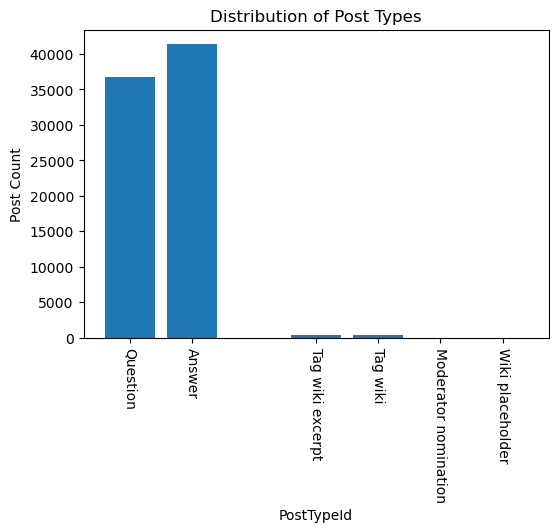

In [7]:
# Get post types
post_type_counts = ds_posts['PostTypeId'].value_counts().sort_index()

# Post type names from data dictionary.
labels = [
    'Question',
    'Answer',
    'Orphaned tag wiki',
    'Tag wiki excerpt',
    'Tag wiki',
    'Moderator nomination',
    'Wiki placeholder',
    'Privilege wiki'
]

# Plot distribution of post types.
plt.figure(figsize=(6,4))
plt.bar(
    x=post_type_counts.index,
    height=post_type_counts.values,
)
plt.title('Distribution of Post Types')
plt.xticks(
    ticks=post_type_counts.index,
    labels=[labels[i - 1] for i in post_type_counts.index],
    rotation=-90
)
plt.xlabel('PostTypeId')
plt.ylabel('Post Count')

Almost all posts on the Data Science Stack Exchange are questions or answers. Answers moderately outnumber questions.

Text(62.597222222222214, 0.5, 'Frequency')

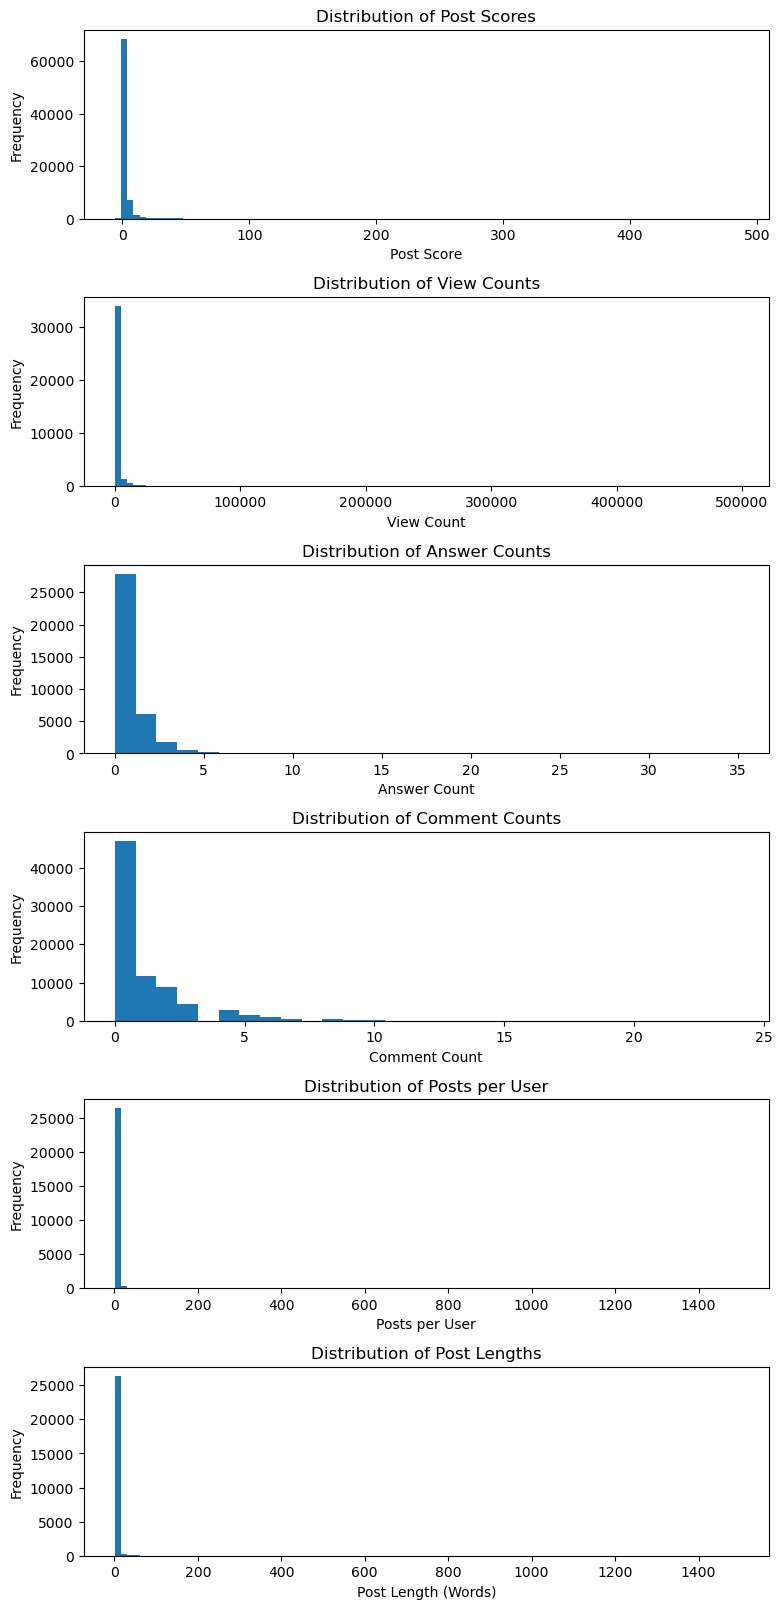

In [8]:
# Create 4 plots in vertical column.
plt.subplots(6, 1, figsize=(8, 16))

# Histogram of scores.
plt.subplot(6, 1, 1)
plt.hist(ds_posts['Score'], bins=100)
plt.title('Distribution of Post Scores')
plt.xlabel('Post Score')
plt.ylabel('Frequency')

# Histogram of view counts.
plt.subplot(6, 1, 2)
plt.hist(ds_posts['ViewCount'], bins=100)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.tight_layout()

# Histogram of answer counts.
plt.subplot(6, 1, 3)
plt.hist(ds_posts['AnswerCount'], bins=30)
plt.title('Distribution of Answer Counts')
plt.xlabel('Answer Count')
plt.ylabel('Frequency')

# Histogram of comment counts.
plt.subplot(6, 1, 4)
plt.hist(ds_posts['CommentCount'], bins=30)
plt.title('Distribution of Comment Counts')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')

# Histogram of posts per user.
posts_per_user = ds_posts.groupby('OwnerUserId')['Id'].count()
plt.subplot(6, 1, 5)
plt.hist(posts_per_user, bins=100)
plt.title('Distribution of Posts per User')
plt.xlabel('Posts per User')
plt.ylabel('Frequency')

post_lengths = ds_posts['Body'].str.split().str.len()
plt.subplot(6, 1, 6)
plt.hist(posts_per_user, bins=100)
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length (Words)')
plt.ylabel('Frequency')

The distributions of all of the plotted numeric features above are heavily skewed. This is unsurprising, as most posts on the StackExchange receive little attention, while a select few posts receive a lot. Similarly, most users post infrequently, while a few high profile users make many posts. The post length plot may be misleading, as the posts are stored as raw HTML.

In [9]:
# Explode tags.
tags = ds_posts['Tags'].str.findall(r'<[^>]*>') \
    .explode().str.replace(r'<|>', '', regex=True)

# Get top 10 tags by question count.
top10_tags = tags.value_counts().sort_values(ascending=False)[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'machine-learning'),
  Text(1, 0, 'python'),
  Text(2, 0, 'deep-learning'),
  Text(3, 0, 'neural-network'),
  Text(4, 0, 'classification'),
  Text(5, 0, 'nlp'),
  Text(6, 0, 'keras'),
  Text(7, 0, 'scikit-learn'),
  Text(8, 0, 'tensorflow'),
  Text(9, 0, 'time-series')])

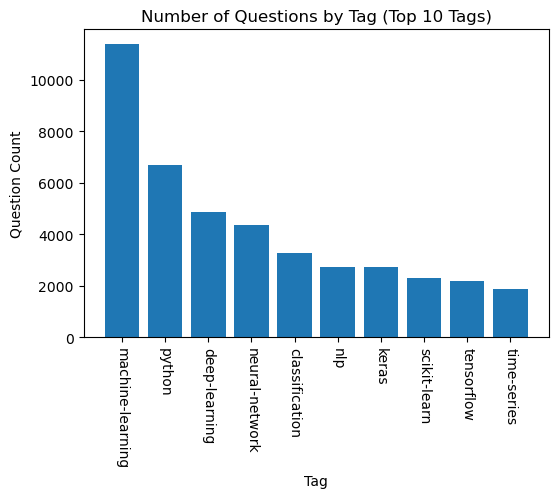

In [10]:
# Plot number of question in top 10 tags.
plt.figure(figsize=(6,4))
plt.bar(
    x=top10_tags.index,
    height=top10_tags.values,
)
plt.title('Number of Questions by Tag (Top 10 Tags)')
plt.xlabel('Tag')
plt.ylabel('Question Count')
plt.xticks(rotation=-90)

`Machine-learning` is, unsurpisingly, the most popular tag, with `python` a distant second. We note the prevalence of tags pertaining to deep learning (`deep-learning`, `neural-network`, `keras`, `tensorflow`).

<Axes: >

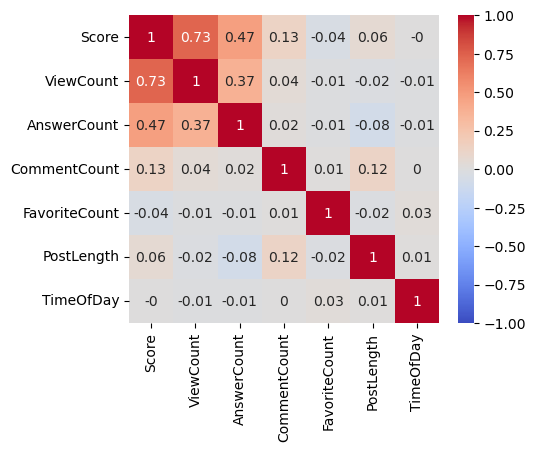

In [11]:
# Non-id numeric columns.
cols = [
    'Score',
    'ViewCount',
    'AnswerCount',
    'CommentCount',
    'FavoriteCount'
]

# Isolate above colums and add in post length and time of post creation columns.
corr_cols = ds_posts.loc[:, cols].copy()
corr_cols['PostLength'] = ds_posts['Body'].str.split().str.len()
time_of_day = ds_posts['CreationDate'] \
    - pd.to_datetime(ds_posts['CreationDate'].dt.date)
corr_cols['TimeOfDay'] = time_of_day.dt.total_seconds() / 3600

# Correlation heatmap.
plt.figure(figsize=(5,4))
sns.heatmap(
    corr_cols.select_dtypes('number').corr().round(2),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm'
)

We see a high positive correlation between `ViewCount` and `Score`. This is partially explained by the fact that high-scoring answers rise higher on question pages, leading to more views. There is also a positive correlation between `Score` and `AnswerCount`. This is likely because well-formulated questions are more likely to receive a high score and more answers. Since most viewers of a question do not answer, questions with a high number of answers are also likely to have a high number of views, hence the positive correlation between `ViewCount` and `AnswerCount`

# Analysis of question posts
---

In [25]:
# Select list of columns.
cols = [
    'Id',
    'Score',
    'ViewCount',
    'AnswerCount',
    'CommentCount',
    'FavoriteCount',
    'AcceptedAnswerId',
    'CreationDate'
]

# Isolate questions.
question_sel = ds_posts['PostTypeId'] == 1
ds_questions_num = ds_posts.loc[question_sel, cols]

# Add post length and time of post creation columns.
ds_questions_num['PostLength'] = ds_posts.loc[question_sel, 'Body'].str.split().str.len()
time_of_day = ds_questions_num['CreationDate'] \
    - pd.to_datetime(ds_questions_num['CreationDate'].dt.date)
ds_questions_num['TimeOfDay'] = time_of_day.dt.total_seconds() / 3600

In [26]:
# Get dates of first answers to questions.
answer_sel = ds_posts['PostTypeId'] == 2
ds_answers = ds_posts.loc[answer_sel, :]
first_answers = ds_answers.groupby('ParentId')['CreationDate'].min()

# Merge dates of first answers.
ds_questions_num = ds_questions_num.merge(
    first_answers,
    how='left',
    left_on='Id',
    right_index=True
).rename(columns={
    'CreationDate_x': 'QuestionDate',
    'CreationDate_y': 'FirstAnswerDate'
})

In [27]:
# Merge date of accepted answer.
ds_questions_num = ds_questions_num.merge(
    ds_posts.loc[answer_sel, ['Id', 'CreationDate']],
    how='left',
    left_on='AcceptedAnswerId',
    right_on='Id'
).rename(columns={'CreationDate': 'AcceptedAnswerDate'})

# Drop unneded columns.
ds_questions_num.drop(
    ['Id_x', 'Id_y', 'AcceptedAnswerId'],
    axis=1,
    inplace=True
)

In [28]:
# Time to get first answer.
ds_questions_num['TimeAnswer'] = (ds_questions_num['FirstAnswerDate'] \
    - ds_questions_num['QuestionDate']).dt.total_seconds() / 86400

# Time to get accepted answer.
ds_questions_num['TimeAcceptAnswer'] = (ds_questions_num['AcceptedAnswerDate'] \
    - ds_questions_num['QuestionDate']).dt.total_seconds() / 86400

In [29]:
# Get question aggregate stats
ds_questions_num.describe().T

count                           mean  \
Score               36792.0                       2.079718   
ViewCount           36792.0                      2110.3803   
AnswerCount         36792.0                       1.124157   
CommentCount        36792.0                        1.08915   
FavoriteCount         585.0                       0.001709   
QuestionDate          36792  2019-12-04 18:27:26.491444992   
PostLength          36792.0                     160.386062   
TimeOfDay           36792.0                      12.946596   
FirstAnswerDate       28004  2019-09-19 17:20:42.869118720   
AcceptedAnswerDate    12146  2019-06-29 18:31:48.132603136   
TimeAnswer          28004.0                      41.478356   
TimeAcceptAnswer    12146.0                      19.341322   

                                           min                            25%  \
Score                                     -6.0                            0.0   
ViewCount                                  1.0                           64.0   
AnswerCount                                0.0                            1.0   
CommentCount                               0.0                            0.0   
FavoriteCount                              0.0                            0.0   
QuestionDate        2014-05-13 23:58:30.457000  2018-06-18 13:00:48.401750016   
PostLength                                 6.0                           75.0   
TimeOfDay                             0.000715                       8.614737   
FirstAnswerDate     2014-05-14 00:36:31.077000  2018-04-30 12:31:00.433999872   
AcceptedAnswerDate  2014-05-14 00:53:43.273000  2018-02-21 09:11:47.286499840   
TimeAnswer                                 0.0                       0.051713   
TimeAcceptAnswer                           0.0                       0.052155   

                                              50%  \
Score                                         1.0   
ViewCount                                   229.0   
AnswerCount                                   1.0   
CommentCount                                  0.0   
FavoriteCount                                 0.0   
QuestionDate        2019-12-09 14:03:41.486499840   
PostLength                                  122.0   
TimeOfDay                               13.291939   
FirstAnswerDate     2019-09-28 11:14:04.495000064   
AcceptedAnswerDate     2019-07-10 23:56:42.240000   
TimeAnswer                               0.215081   
TimeAcceptAnswer                         0.212054   

                                              75%                         max  \
Score                                         2.0                       289.0   
ViewCount                                   984.0                    496643.0   
AnswerCount                                   1.0                        35.0   
CommentCount                                  2.0                        23.0   
FavoriteCount                                 0.0                         1.0   
QuestionDate           2021-06-28 19:27:58.564000  2024-03-01 22:34:09.627000   
PostLength                                  197.0                      4621.0   
TimeOfDay                               17.608387                   23.999464   
FirstAnswerDate     2021-04-01 18:46:27.764250112  2024-03-01 19:30:58.523000   
AcceptedAnswerDate  2020-12-10 22:58:02.364250112  2024-02-29 09:14:53.150000   
TimeAnswer                               1.135238                 2908.992682   
TimeAcceptAnswer                         0.999323                 2830.583687   

                             std  
Score                   6.446488  
ViewCount           10830.220741  
AnswerCount             1.036488  
CommentCount            1.854097  
FavoriteCount           0.041345  
QuestionDate                 NaN  
PostLength            152.387916  
TimeOfDay               5.961555  
FirstAnswerDate              NaN  
AcceptedAnswerDate           NaN  
TimeAnswer            184.889856

We note that the median time to accept an answer and the median time to receive an answer are nearly identical. However, the mean time to accept an answer is significantly lower than the mean time to receive an answer. This is likely because there are outlier questions which receive a very late answer but unaccepted answer. A late answer is less likely to be accepted, as the question asker is liable to stop paying attention to their question after some time.

Text(0, 0.5, 'Frequency')

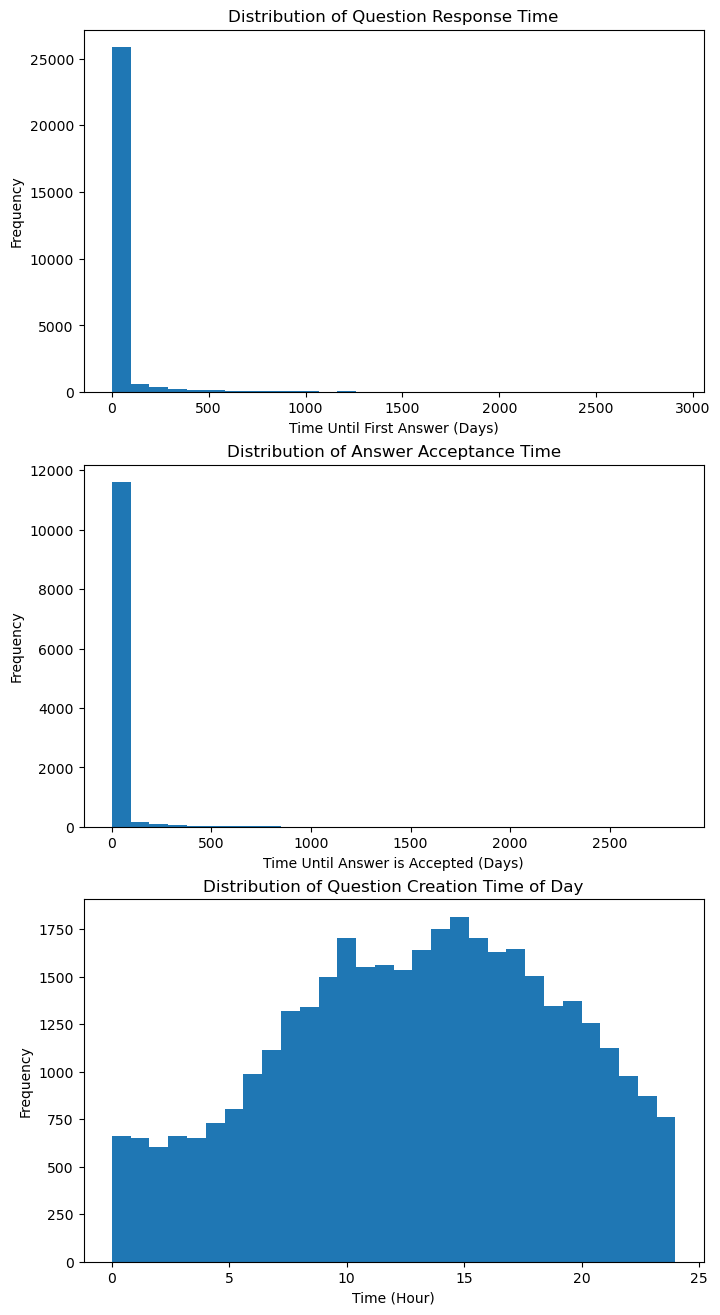

In [30]:
# Create vertical column of 3 plots.
plt.subplots(3, 1, figsize=(8,16))

# Histogram of question response time.
plt.subplot(3, 1, 1)
plt.hist(ds_questions_num['TimeAnswer'], bins=30)
plt.title('Distribution of Question Response Time')
plt.xlabel('Time Until First Answer (Days)')
plt.ylabel('Frequency')

# Histogram of answer acceptance time.
plt.subplot(3, 1, 2)
plt.hist(ds_questions_num['TimeAcceptAnswer'], bins=30)
plt.title('Distribution of Answer Acceptance Time')
plt.xlabel('Time Until Answer is Accepted (Days)')
plt.ylabel('Frequency')

# Histogram of question creation time.
plt.subplot(3, 1, 3)
plt.hist(ds_questions_num['TimeOfDay'], bins=30)
plt.title('Distribution of Question Creation Time of Day')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency')

We see skewed distributions for both response time and answer acceptance time. The distribution of the time of day at which questions are created resembles a normal distribution, but with fat tails.

<Axes: >

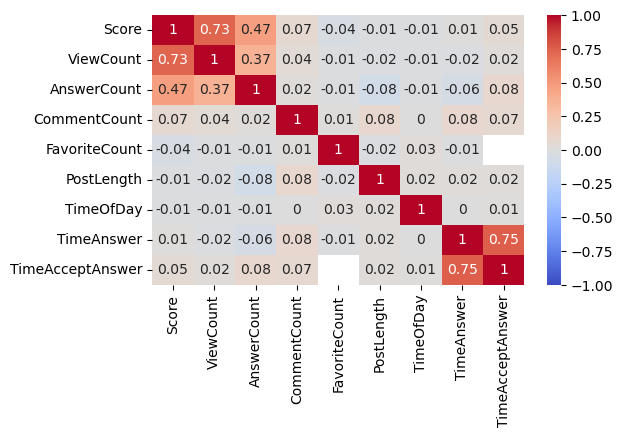

In [33]:
# Correlation map for question data.
plt.figure(figsize=(6,3.5))
sns.heatmap(
    ds_questions_num.select_dtypes('number').corr().round(2),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm'
)

We see that `Score` is positively correlated with `AnswerCount` and `ViewCount` and `ViewCount` is positively correlated with `AnswerCount`. `TimeAnswer` and `TimeAcceptAnswer` are highly positively correlated for clear reasons.

In [19]:
# Separate questions.
question_sel = ds_posts['PostTypeId'] == 1
ds_questions = ds_posts.loc[question_sel, :]

In [20]:
# Find percentage of questions with accepted answer by top 10 tags.

answered_accepted = ds_questions['AcceptedAnswerId'].notna()
top10_tags_sel = tags[tags.isin(top10_tags.index)].index
percentages = []

for tag in top10_tags.index:
    tag_indices = tags == tag
    tag_indices = tag_indices[~tag_indices.index.duplicated()]
    questions_with_tag = ds_questions.loc[tag_indices, :]
    percentage = 100*questions_with_tag['AcceptedAnswerId'].notna().mean()
    percentages.append(percentage)

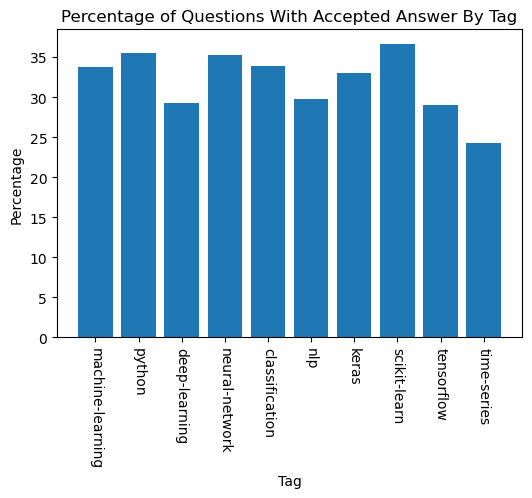

In [21]:
# Plot percentage of questions with accepted answer by top 10 tags.
plt.figure(figsize=(6,4))
plt.bar(
    x=top10_tags.index,
    height=percentages,
)
plt.title('Percentage of Questions With Accepted Answer By Tag')
plt.xlabel('Tag')
plt.ylabel('Percentage')
plt.xticks(rotation=-90)
plt.show()

There is not much variation between answer acceptance rates among the different subjects.

# Time plots
---

In [22]:
# Create time series indexed by post creation date.
ds_posts_time = ds_posts.set_index(
    'CreationDate',
    drop=True
).sort_index() 

In [23]:
# Get posts per day
posts_per_day = ds_posts_time.loc[:, 'PostTypeId'] \
    .resample('D').count()

In [24]:
# Separate questions.
question_sel = ds_posts_time['PostTypeId'] == 1
ds_questions_time = ds_posts_time.loc[question_sel.index, :]

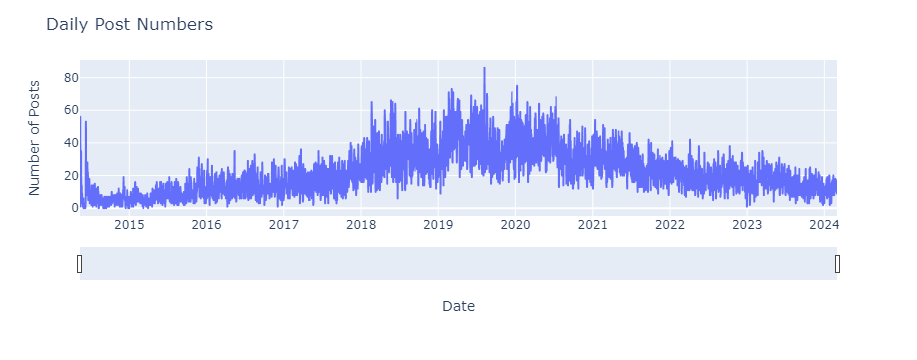

In [25]:
# Plot time series of number of posts on each day.
fig = px.line(
    posts_per_day,
    x=posts_per_day.index,
    y='PostTypeId'
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Posts', 
    title='Daily Post Numbers'
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

We notice a general upward trend in post activity from 2014-2020, followed by a downward trend. This may be due to COVID causing people to rely on online communication more. It may be necessaryto divide the time series in half for analysis.

In [26]:
answered_accepted = ds_questions['AcceptedAnswerId'].notna()
top10_tags_sel = tags[tags.isin(top10_tags.index)].index
percentages = []

for tag in top10_tags.index:
    tag_indices = tags == tag
    tag_indices = tag_indices[~tag_indices.index.duplicated()]
    questions_with_tag = ds_questions.loc[tag_indices, :]
    percentage = 100*questions_with_tag['AcceptedAnswerId'].notna().mean()
    percentages.append(percentage)

In [27]:
# Time series counting posts per day in each of top 10 tags.

posts_by_tag = []
top3_tags = top10_tags.head(3).index

for tag in top3_tags:
    tag_indices = tags == tag
    tag_indices = tag_indices[~tag_indices.index.duplicated()]
    questions_with_tag = ds_questions.loc[tag_indices, :] \
        .set_index('CreationDate', drop=True).sort_index() \
        .loc[:, 'PostTypeId'].resample('D').count().rename(tag)
    posts_by_tag.append(questions_with_tag)

posts_by_tag = pd.concat(posts_by_tag, axis=1)

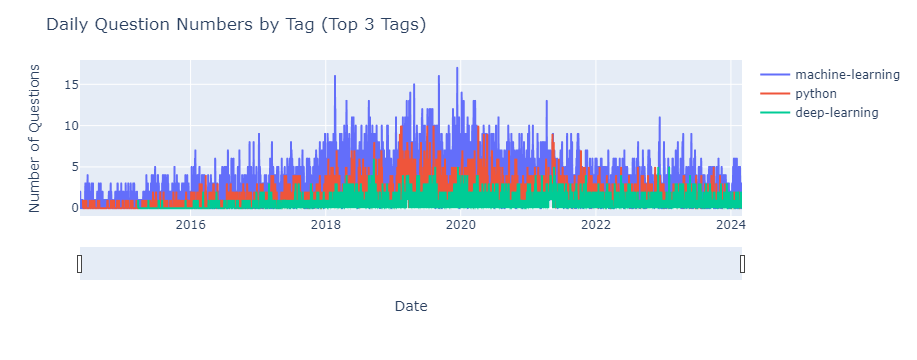

In [28]:
# Time series plots of daily post numbers for top 3 tags.
fig = px.line(
    posts_by_tag,
    x=posts_by_tag.index,
    y=posts_by_tag.columns
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Questions', 
    legend_title='', 
    title='Daily Question Numbers by Tag (Top 3 Tags)'
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Daily question numbers for each of the top three tags seem to follow the same patterns as overall daily post numbers. The more prevalent the tag, the more strongly the question numbers exhibit these patterns.